In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',80)
pd.set_option('display.max_columns',80)
pd.set_option('max_colwidth',300)
sns.set_palette("Blues")
sns.set_style('whitegrid')


In [39]:
data=pd.read_csv('ibm employees.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [40]:
data=data.drop(['HourlyRate','Over18','MonthlyRate','DailyRate','StandardHours','EmployeeCount','EducationField'],axis=1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [41]:
#Defining a fxn to classify their distance from home
def distance (x):
    if x<=9:
        return 'Short Distance'
    elif x<=19:
        return 'Moderately Far'
    else:
        return 'Far'
data['Distance_score']=data['DistanceFromHome'].apply(distance)


In [5]:
data.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [42]:
#Defining a fxn to classify their experience
def experience (x):
    if x<=3:
        return 'Little Experience'
    elif x<=6:
        return 'Experienced'
    else:
        return 'Highly Experienced'
data['Experience']=data['NumCompaniesWorked'].apply(experience)


In [7]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [43]:
#Defining a fxn to classify their income
def income (x):
    if x<=5000:
        return 'Junior Salary'
    elif x<=10000:
        return 'Middle Level Salary'
    elif x<=15000:
        return 'Senior Salary'
    else:
        return 'Manager Salary'
data['Salary Level']=data['MonthlyIncome'].apply(income)

In [12]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Distance_score,Experience,Salary Level
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Short Distance,Highly Experienced,Manager Salary
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7,Short Distance,Little Experience,Manager Salary
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Short Distance,Experienced,Manager Salary
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0,Short Distance,Little Experience,Manager Salary
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2,Short Distance,Highly Experienced,Manager Salary


In [17]:
data.YearsSinceLastPromotion.value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [44]:
#Defining a fxn to classify their promotion
def promotion (x):
    if x<=5:
        return 'Recently promoted'
    elif x<=10:
        return 'Promoted within 6 to 10 years'
    else:
        return 'Rarely Promoted'
data['Promotion Pattern']=data['YearsSinceLastPromotion'].apply(promotion)

In [16]:
data.YearsAtCompany.value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

In [48]:
#Defining a fxn to classify their years at the company
def companyyears (x):
    if x<=10:
        return 'Less than 10 years'
    elif x<=20:
        return '11-20 years'
    elif x<=30:
        return '21-30 years'
    else:
        return 'Above 30 years'
data['Years at company']=data['YearsAtCompany'].apply(companyyears)

In [46]:
data['Education'].replace(1,'no college',inplace=True)
data['Education'].replace(2,'undergrad',inplace=True)
data['Education'].replace(3,'graduate',inplace=True)
data['Education'].replace(4,'masters',inplace=True)
data['Education'].replace(5,'phd',inplace=True)


In [49]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Distance_score,Experience,Salary Level,Promotion Pattern,Years at company
0,41,Yes,Travel_Rarely,Sales,1,undergrad,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Short Distance,Highly Experienced,Middle Level Salary,Recently promoted,Less than 10 years
1,49,No,Travel_Frequently,Research & Development,8,no college,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7,Short Distance,Little Experience,Middle Level Salary,Recently promoted,Less than 10 years
2,37,Yes,Travel_Rarely,Research & Development,2,undergrad,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Short Distance,Experienced,Junior Salary,Recently promoted,Less than 10 years
3,33,No,Travel_Frequently,Research & Development,3,masters,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0,Short Distance,Little Experience,Junior Salary,Recently promoted,Less than 10 years
4,27,No,Travel_Rarely,Research & Development,2,no college,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2,Short Distance,Highly Experienced,Junior Salary,Recently promoted,Less than 10 years


In [50]:
data['Years at company'].value_counts()

Less than 10 years    1224
11-20 years            180
21-30 years             50
Above 30 years          16
Name: Years at company, dtype: int64

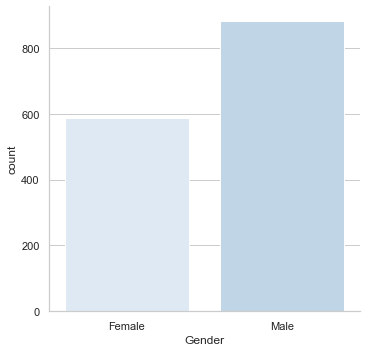

In [64]:
#sex
fig1=sns.catplot(x='Gender',kind='count',data=data)
fig1
fig1.savefig("output1.png")

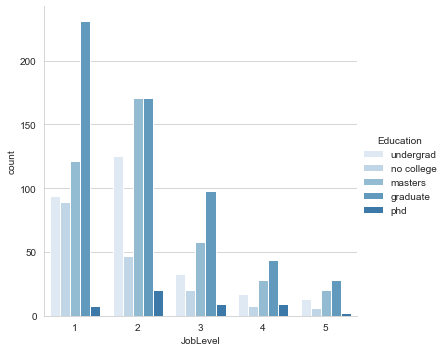

In [19]:
#educational level(no college,undergrad,graduate,masters,phd)
fig2=sns.catplot(x='JobLevel',hue='Education',kind='count',data=data)
fig2
fig2.savefig("output2.png")

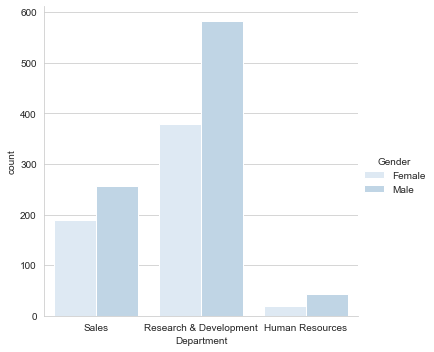

In [17]:
#Departments
fig3=sns.catplot(x='Department',kind='count', hue='Gender', data=data)
fig3
fig3.savefig("output3.png")

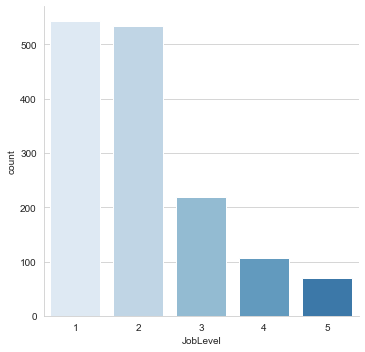

In [32]:
#JobLevel
fig4=sns.catplot(x='JobLevel',kind='count',data=data)
fig4
fig4.savefig("output4.png")

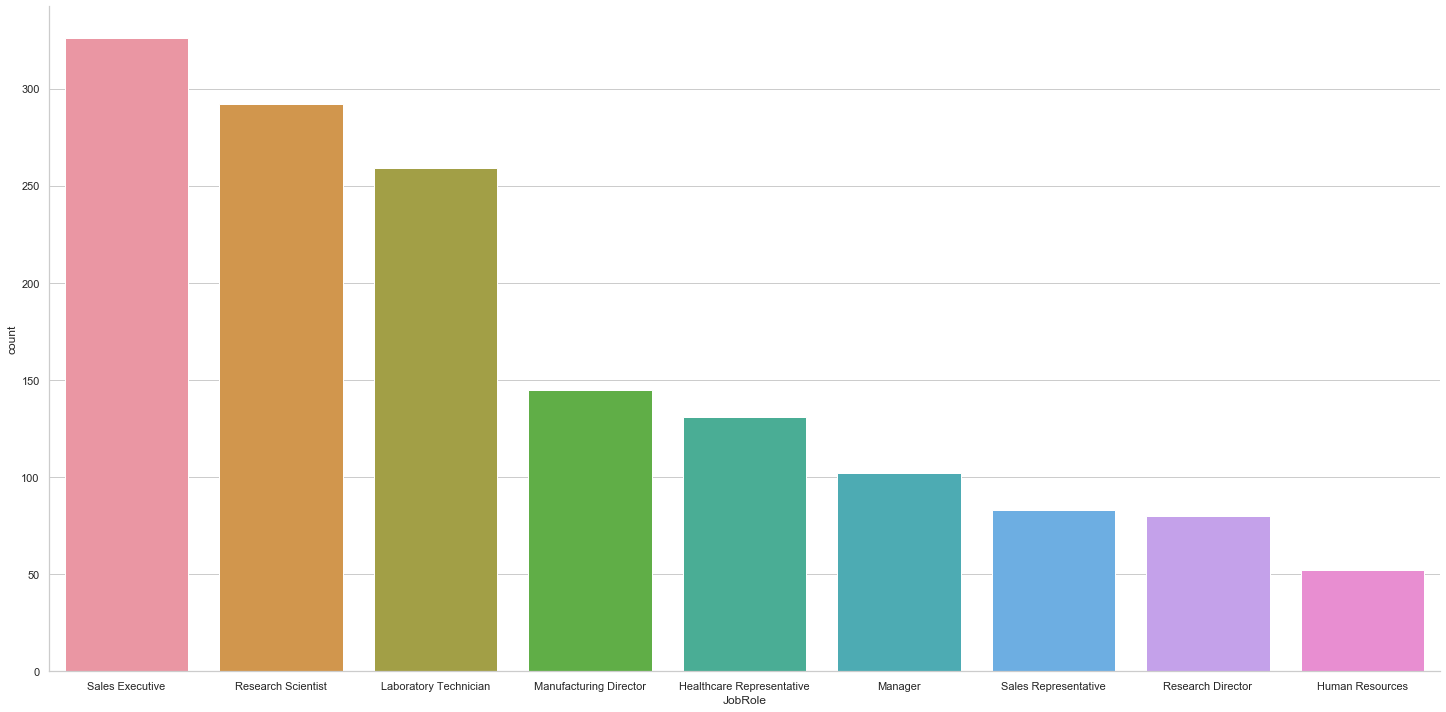

In [65]:
#JobRole
fig5=sns.catplot(x='JobRole',kind='count',data=data,aspect=2,size=10)
fig5
fig5.savefig("output5.png")

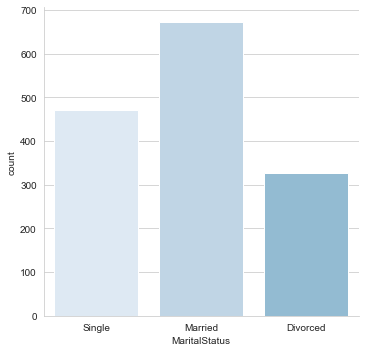

In [34]:
#MaritalStatus
fig6=sns.catplot(x='MaritalStatus',kind='count',data=data)
fig6
fig6.savefig("output6.png")

In [56]:
#Gender score
def gender (x):
    if x=='Male':
        return 0
    else:
        return 1
data['gender number']=data['Gender'].apply(gender)

In [57]:
#Attrition score
def attrition (x):
    if x=='No':
        return 0
    else:
        return 1
data['Attrition number']=data['Attrition'].apply(attrition)

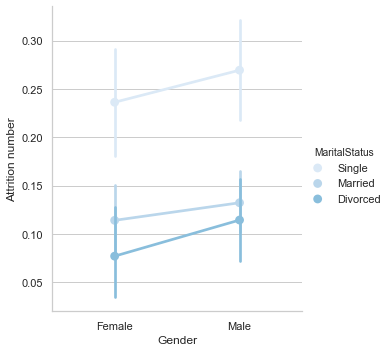

In [66]:
#Gender,marital status and attrition
fig7=sns.factorplot(x='Gender',y='Attrition number',hue='MaritalStatus',data=data,aspect=0.9,size=5,ci=95.0)
fig7
fig7.savefig("output7.png")

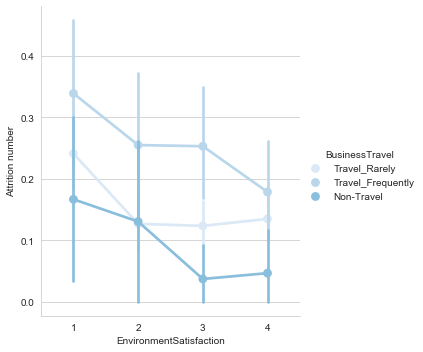

In [36]:
#Gender,marital status and attrition
fig8=sns.factorplot(x='EnvironmentSatisfaction',y='Attrition number',hue='BusinessTravel',data=data,aspect=0.9,size=5,ci=95.0)
fig8
fig8.savefig("output8.png")

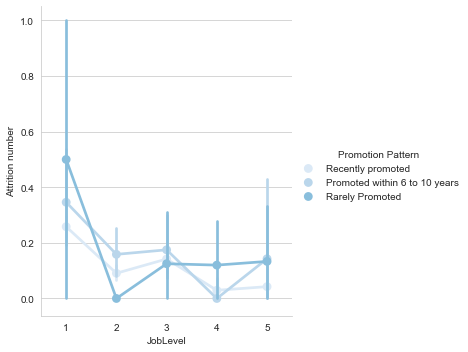

In [37]:
#Gender,marital status and attrition
fig9=sns.factorplot(x='JobLevel',y='Attrition number',hue='Promotion Pattern',data=data,aspect=0.9,size=5,ci=95.0)
fig9
fig9.savefig("output9.png")

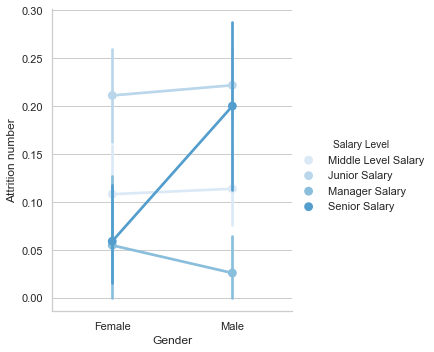

In [67]:
#Gender,marital status and attrition
fig10=sns.factorplot(x='Gender',y='Attrition number',hue='Salary Level',data=data,aspect=0.9,size=5,ci=95.0)
fig10
fig10.savefig("output10.png")

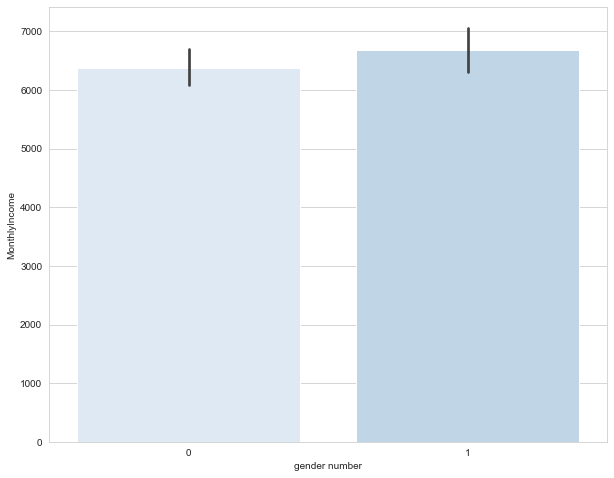

In [42]:
plt.figure(figsize=[10,8])
sns.barplot('gender number','MonthlyIncome',data=data)

In [ ]:
plt.scatter(m_train,n_train)
plt.show()

<Figure size 1800x1080 with 0 Axes>

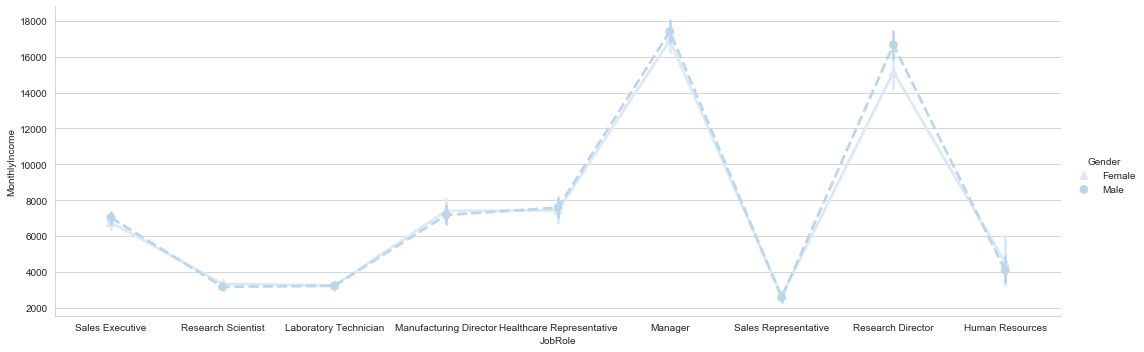

In [26]:
plt.figure(figsize=(25,15))
fig11=sns.catplot(x="JobRole", y="MonthlyIncome", hue="Gender",
            markers=["^", "o"], linestyles=["-", "--"],lineweight=(10,3),
            kind='point', heigh=10,aspect=3,data=data);
fig11
fig11.savefig("output11.png")

<Figure size 1800x1080 with 0 Axes>

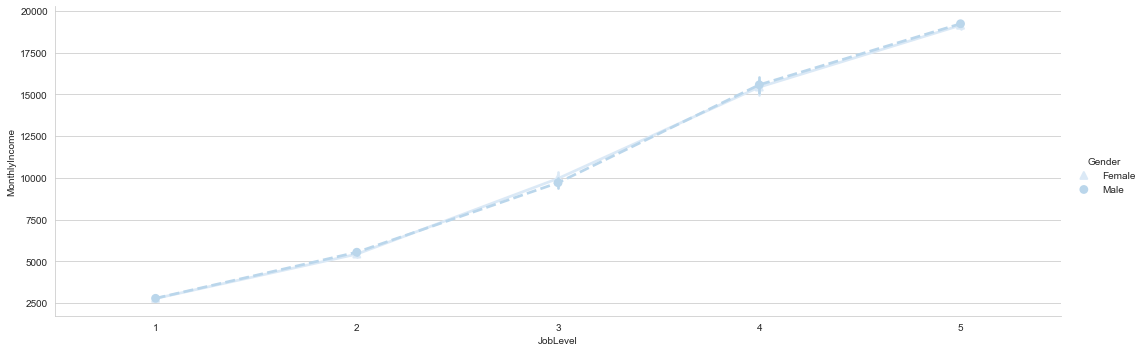

In [34]:
plt.figure(figsize=(25,15))
fig12=sns.catplot(x="JobLevel", y="MonthlyIncome", hue="Gender",
            markers=["^", "o"], linestyles=["-", "--"],linewidth={"Male": 10, "Female": 1},
            kind='point', heigh=10,aspect=3,data=data);
fig12
fig12.savefig("output12.png")

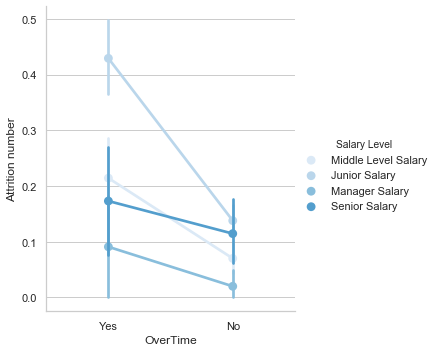

In [68]:
#Gender,marital status and attrition
fig13=sns.factorplot(x='OverTime',y='Attrition number',hue='Salary Level',data=data,aspect=0.9,size=5,ci=95.0)
fig13
fig13.savefig("output13.png")

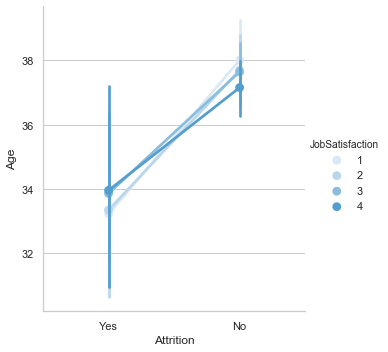

In [70]:
#Gender,marital status and attrition
fig14=sns.factorplot(x='Attrition',y='Age',hue='JobSatisfaction',data=data,aspect=0.9,size=5,ci=95.0)
fig14
fig14.savefig("output14.png")

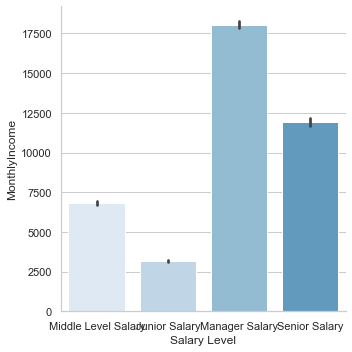

In [72]:
#MaritalStatus
fig15=sns.catplot(x='Salary Level',y='MonthlyIncome',kind='bar',data=data)
fig15
fig15.savefig("output15.png")

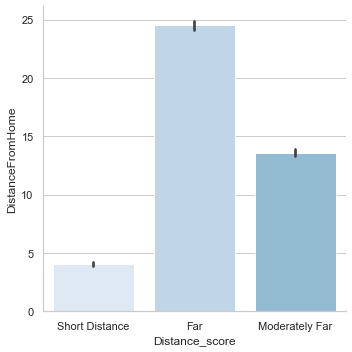

In [73]:
#MaritalStatus
fig16=sns.catplot(x='Distance_score',y='DistanceFromHome',kind='bar',data=data)
fig16
fig16.savefig("output16.png")

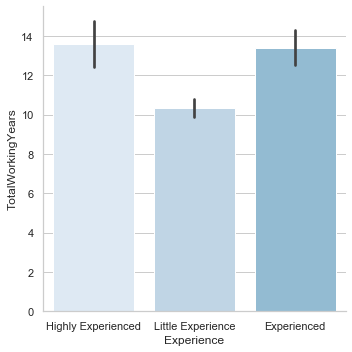

In [74]:
#MaritalStatus
fig17=sns.catplot(x='Experience',y='TotalWorkingYears',kind='bar',data=data)
fig17
fig17.savefig("output17.png")

In [ ]:
#MaritalStatus
fig15=sns.catplot(x='Salary Level',y='MonthlyIncome',kind='bar',data=data)
fig15
fig15.savefig("output15.png")

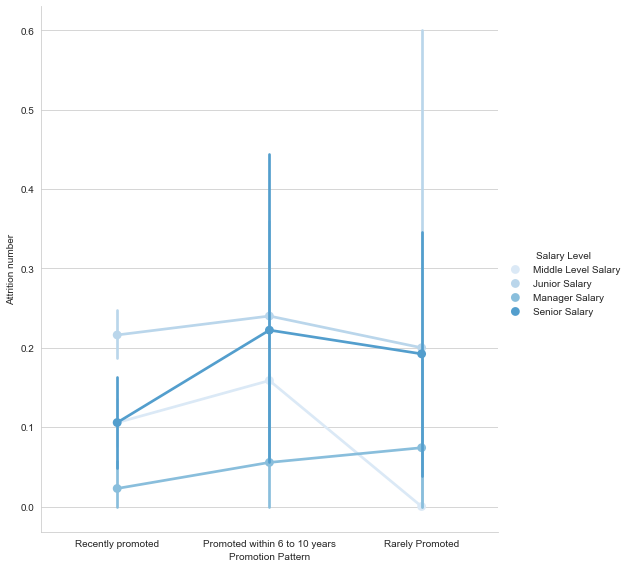

In [62]:
#Gender,marital status and attrition
fig18=sns.factorplot(x='Promotion Pattern',y='Attrition number',hue='Salary Level',data=data,aspect=0.9,size=8,ci=95.0)
fig18
fig18.savefig("output18.png")

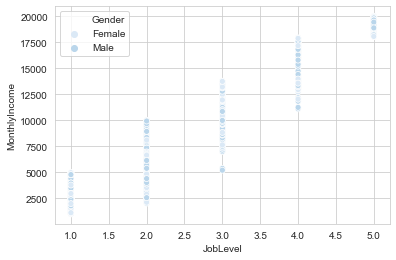

In [67]:
sns.scatterplot(x='JobLevel', y='MonthlyIncome',
                hue='Gender', data=data)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

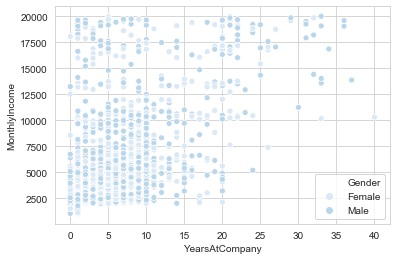

In [81]:
fig19=sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome',hue='Gender', data=data)
fig19
fig19.savefig("output19.png")


KeyError: 'M'

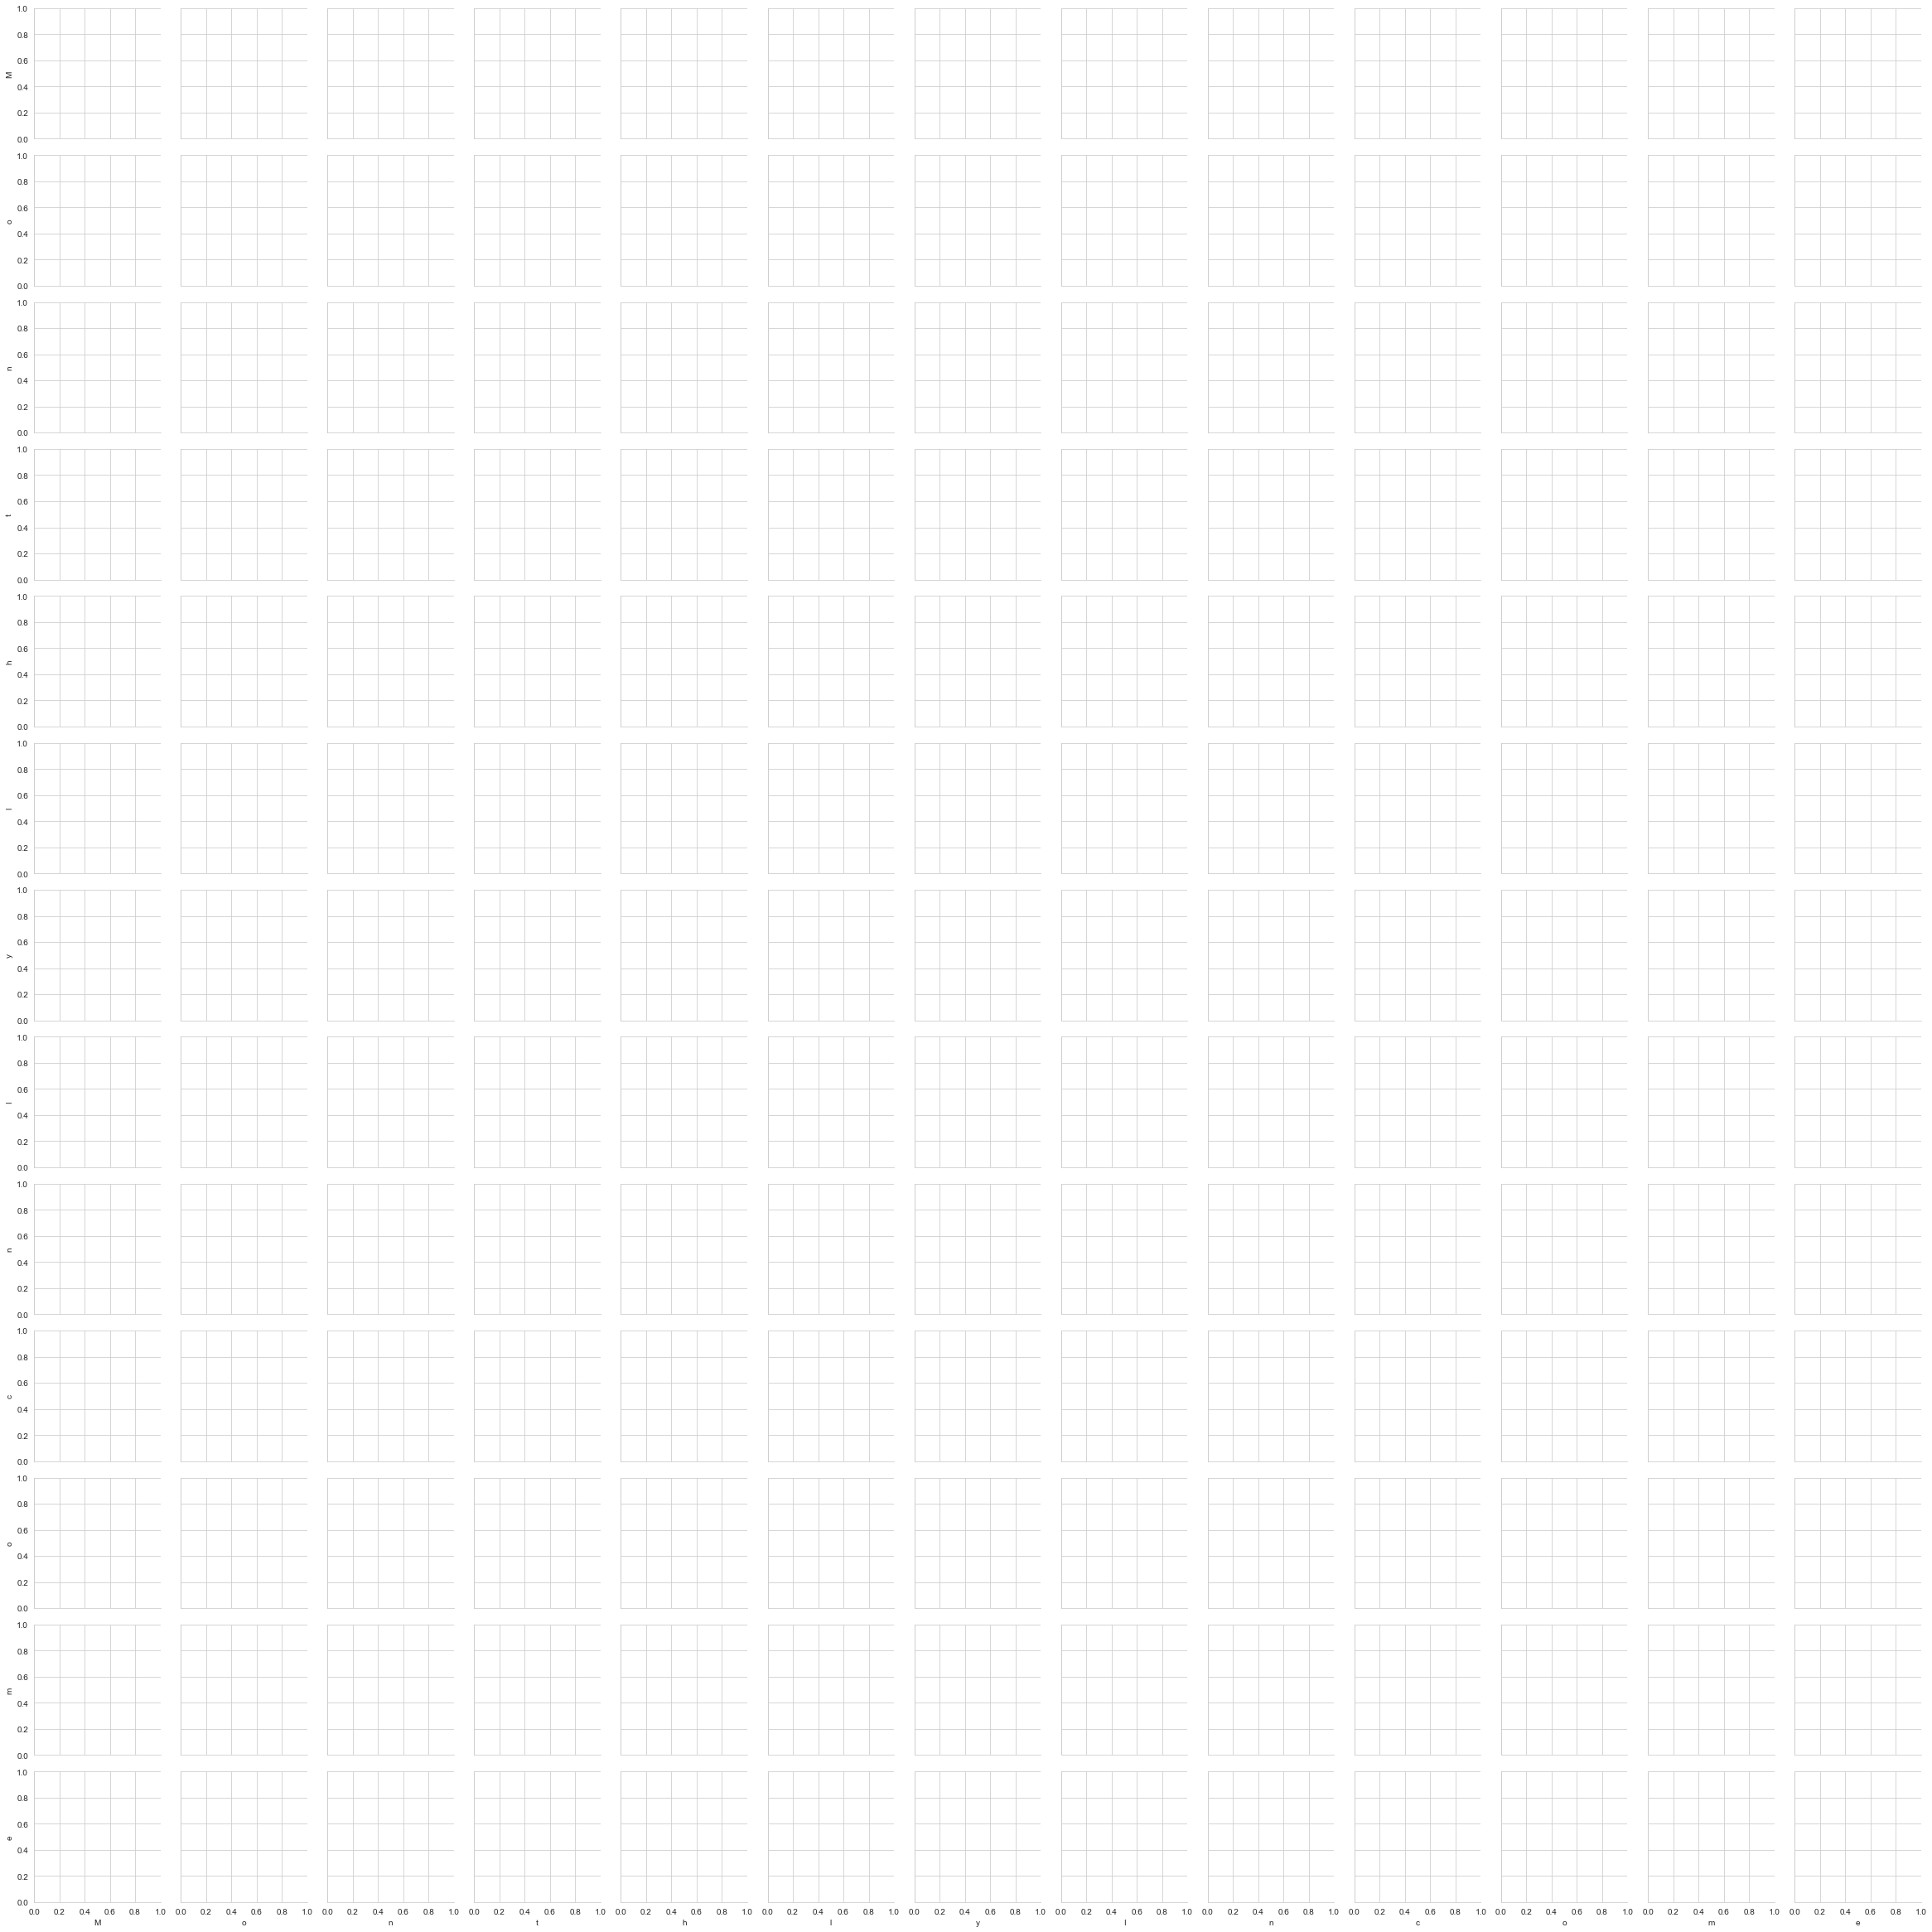

In [80]:
ax = sns.pairplot(data, vars='MonthlyIncome', hue='Gender')
plt.savefig('pairplot.eps', format='eps', dpi=300)

In [15]:
x=data.drop(['Attrition'],1)
y=data['Attrition']

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

ValueError: could not convert string to float: 'Travel_Rarely'